In [61]:
# Imports iniciales
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
# Defino una función más general a la pedida para no repetir código, luego
# defino funciones más específicas con lo pedido.

# Función para generar n puntos d-dimensionales provenientes de una distribución
# normal con desviación estándar igual a std, devuelve un dataframe con
# ceiling(n/2) puntos centrados en center0 y floor(n/2) puntos centrados en
# center1.
def generate_points(d, n, std, center0, center1):
  cov = std ** 2
  covMatr = np.diag([cov] * d)
  data = []

  # Si n es impar la clase 0 va a tener un elemento más que la clase 1
  lenClass1 = n // 2
  lenClass0 = n - lenClass1

  # Genero los puntos de la clase 0
  for i in range(lenClass0):
    vector = np.random.multivariate_normal(center0, covMatr).tolist() + [0]
    data += [vector]

  # Genero los puntos de la clase 1
  for i in range(lenClass1):
    vector = np.random.multivariate_normal(center1, covMatr).tolist() + [1]
    data += [vector]

  colNames = list(range(d)) + ["Class"] 

  # Devuelvo un dataframe con los puntos generados
  return pd.DataFrame(data, columns = colNames)

In [63]:
# Función para apartado a
def apartado_a(d, n, C):
  return generate_points(d, n, C * np.sqrt(d), [-1] * d, [1] * d)

# Función para apartado b
def apartado_b(d, n, C):
  # (1, 0, ... , 0)
  center0 = [1] + ([0] * (d - 1))
  # (-1, 0, ... , 0)
  center1 = [-1] + ([0] * (d - 1))
  return generate_points(d, n, C, center0, center1)

In [64]:
# Genero el primer par de conjuntos pedidos para verificar los problemas
df_a1 = apartado_a(2, 200, 0.75)
df_b1 = apartado_b(2, 200, 0.75)

In [65]:
# Fuente: https://stackoverflow.com/a/63539077
# Dado un dataframe con 3 columnas: 0, 1, y Class. 
# Grafica los puntos dados en un plano cartesiano donde por cada fila se toma 
# a la columna 0 la coordenada x, y a la columna 1 como la coordenada y.
# Los puntos de la clase 0 se grafican en naranja y los puntos de la clase 1
# en azul.
def graph_df(df):
  # Separo los puntos por clase
  x0, y0 = df[0][df.Class == 0], df[1][df.Class == 0]
  x1, y1 = df[0][df.Class == 1], df[1][df.Class == 1]

  # Calculo los máximos y mínimos para tener límites en x e y del gráfico simétricos
  xmax, xmin = max(max(x0), max(x1)), min(min(x0), min(x1))
  xmax = max(abs(xmax), abs(xmin))
  
  ymax, ymin = max(max(y0), max(y1)), min(min(y0), min(y1))
  ymax = max(abs(ymax), abs(ymin))

  xmax = np.ceil(max(xmax, ymax))
  ymax = xmax
  xmin, ymin = xmax * -1, ymax * -1

  # Grafico
  fig, ax = plt.subplots(figsize=(10, 10))
  ax.scatter(x0, y0, c = 'orange', label = "Clase 0")
  ax.scatter(x1, y1, c = 'blue', label = "Clase 1")

  ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax), aspect='equal')

  ax.spines['bottom'].set_position('zero')
  ax.spines['left'].set_position('zero')
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  
  ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
  ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)

  x_ticks = np.arange(xmin, xmax+1, 1)
  y_ticks = np.arange(ymin, ymax+1, 1)
  ax.set_xticks(x_ticks[x_ticks != 0])
  ax.set_yticks(y_ticks[y_ticks != 0])
 
  ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

  arrow_fmt = dict(markersize=4, color='black', clip_on=False)
  ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
  ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

  ax.legend()

  plt.show()

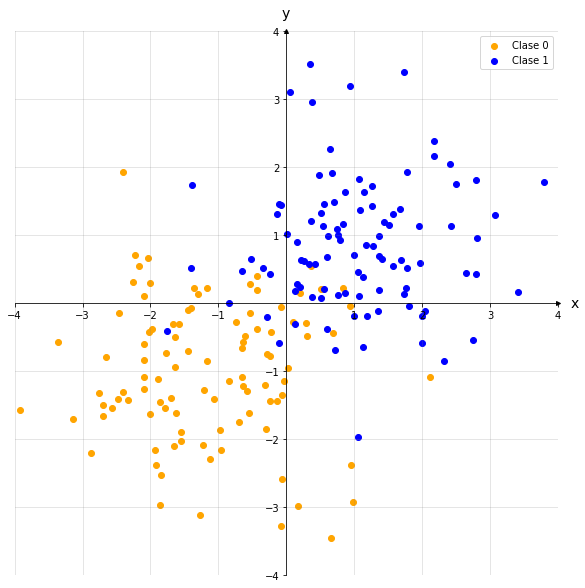

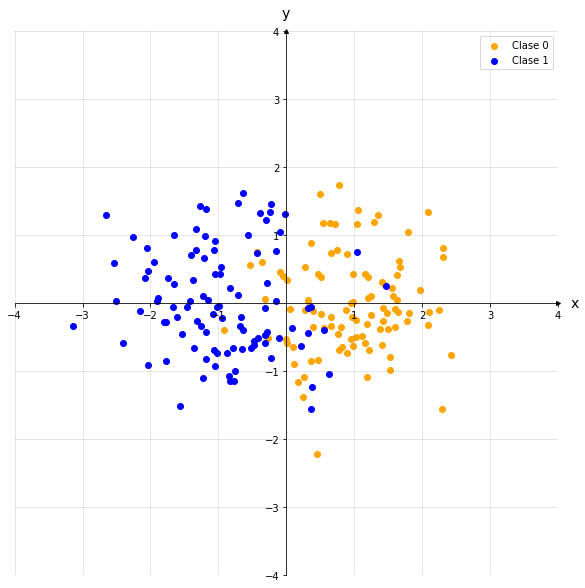

In [66]:
# Grafico los conjuntos generados anteriormente
graph_df(df_a1)
graph_df(df_b1)

In [67]:
# Genero el segundo par de conjuntos pedidos para verificar los problemas.
df_a2 = apartado_a(4, 2000, 2.00)
df_b2 = apartado_b(4, 2000, 2.00)

# Agrupo los puntos por clase y calculo las medias de los valores de cada dimensión.
# Las medias de la clase 0 deberían aproximarse al centro (-1, -1, -1, -1)
# Las medias de la clase 1 deberían aproximarse al centro (1, 1, 1, 1)
print(df_a2.groupby('Class').mean()) # 
# Las medias de la clase 0 deberían aproximarse al centro (-1, -0, 0, 0, 0)
# Las medias de la clase 1 deberían aproximarse al centro (1, -0, 0, 0, 0)
print(df_b2.groupby('Class').mean()) # 

# Agrupo los puntos por clase y calculo las desviaciones estándar de los valores de
# cada dimensión.
print(df_a2.groupby('Class').std()) # Todos los valores deberían aproximarse a 4
print(df_b2.groupby('Class').std()) # Todos los valores deberían aproximarse a 2

              0         1         2         3
Class                                        
0     -0.967885 -1.022849 -1.112502 -1.069307
1      1.130813  1.055054  0.642238  0.907604
              0         1         2         3
Class                                        
0      0.972377  0.058793  0.023523 -0.120235
1     -1.076270 -0.039407 -0.009486  0.001197
              0         1         2         3
Class                                        
0      4.118231  3.866169  4.089567  3.888264
1      3.836422  3.849636  4.047840  4.020670
              0         1         2         3
Class                                        
0      1.919285  2.002263  1.980545  2.012864
1      2.027974  1.919570  1.988636  2.034157


In [68]:
# Función para convertir coordenadas cartesianas a coordenadas polares
def cartesian_to_polar(x, y):
  ro = np.sqrt(x ** 2 + y ** 2)

  if (x > 0 and y >= 0):
    theta = np.arctan(y / x)
  elif (x == 0 and y > 0):
    theta = np.pi / 2
  elif (x < 0):
    theta = np.arctan(y / x) + np.pi
  elif (x == 0 and y < 0):
    theta = (3 * np.pi) / 2
  elif (x > 0 and y < 0):
    theta = np.arctan(y / x) + 2 * np.pi

  return ro, theta

# Esta función dado un n genera n puntos distribuidos uniformemente sobre los ejes
# x e y que se encuentren en un círculo de radio radius con centro en center.
# Devuelve un dataframe donde n/2 puntos pertenecen a la clase 0 donde estos se
# encuentran en las curvas dadas, el resto de los n/2 puntos pertenecen a la
# clase 1. 
def generate_points_polar_between_curves(n, radius, center, curve1, curve2):
  data = []
  centerx, centery = center
  
  # Si n es impar la clase 0 va a tener un elemento más que la clase 1
  lenClass1 = n // 2
  lenClass0 = n - lenClass1

  # Ints para iterar sobre la cantidad actual de puntos generados para cada clase
  cantClass0 = 0
  cantClass1 = 0

  # Genero puntos hasta obtener la cantidad necesaria en cada clase
  while (cantClass0 < lenClass0 or cantClass1 < lenClass1):
    # Genero punto al azar con distribución uniforme en sistema de referencia x-y
    x = np.random.uniform(centerx - radius, centerx + radius)
    y = np.random.uniform(centery - radius, centery + radius)

    # Calculo sus coordenadas polares
    ro, theta = cartesian_to_polar(x, y)

    # Si no está dentro del círculo lo ignoro
    if (x - centerx) ** 2 + (y - centery) ** 2 <= radius ** 2:
      betweenCurves = False
      # Si está entre las dos curvas dadas y faltan puntos la clase 0 lo agrego en esa clase.
      for theta0 in [theta + (2 * np.pi * i) for i in range(-1, 6)]:
        if curve1(theta0) <= ro and ro <= curve2(theta0):
          if cantClass0 < lenClass0:
            data += [(x, y, 0)]
            cantClass0 += 1
          betweenCurves = True
          continue
      # Si no estaba entre las curvas y faltan puntos en la clase 1, lo agrego ahí.
      if cantClass1 < lenClass1 and not betweenCurves:
        data += [(x, y, 1)]
        cantClass1 += 1

  colNames = [0, 1, "Class"] 

  # Devuelvo un dataframe con los puntos generados
  return pd.DataFrame(data, columns = colNames)  

In [69]:
# Apartado c
# Genero los puntos
curve1 = lambda theta : (theta / (4 * np.pi))
curve2 = lambda theta : ((theta + np.pi) / (4 * np.pi))
df_polar = generate_points_polar_between_curves(10000, 1, (0, 0), curve1, curve2)
# Verifico que los puntos se distribuyan correctamente entre clases.
df_polar.groupby('Class').count()

,0,1
Class,,
0,5000,5000
1,5000,5000


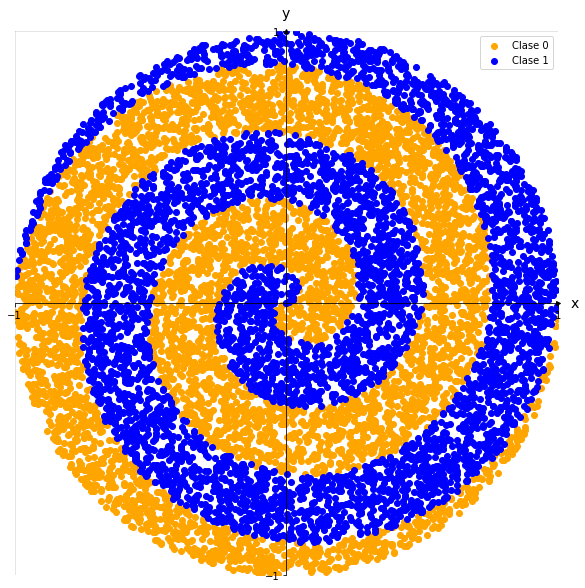

In [70]:
# Grafico los puntos
graph_df(df_polar)